# data4physics homework

## XP spectra:  
* how to access Gaia XP spectra ref: [https://www.cosmos.esa.int/web/gaia-users/archive/datalink-products#datalink_jntb_get_all_prods]  

## APOGEE labels (Teff, Log g):  
* labels: APOGEE DR17 catalog. [https://www.sdss4.org/dr17/irspec/spectro_data/]  
data model : [https://data.sdss.org/datamodel/files/APOGEE_ASPCAP/APRED_VERS/ASPCAP_VERS/allStarLite.html]  

In [28]:
%config InlineBackend.figure_format = "retina"
%matplotlib inline
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm,Normalize

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 14

import numpy as np

# Read data

In [12]:
import pickle

data_dir = "/data/jdli/gaia/"
tr_file  = "ap17_xpcont_train.pickle"
val_file = "ap17_xpcont_validation.pickle"


with open(data_dir+tr_file, 'rb') as f1:
    data_tr = pickle.load(f1)

with open(data_dir+val_file, 'rb') as f2:
    data_val = pickle.load(f2)
    
    
print("Keys of training set and validation set are:")
print(data_tr.keys(), "\n", data_val.keys())

print("array shape of traing set and validation set are:")
print([data_tr[_].shape for _ in data_tr.keys()], "\n", [data_val[_].shape for _ in data_val.keys()])

Keys of training set and validation set are:
dict_keys(['bp_coef', 'rp_coef', 'labels']) 
 dict_keys(['bp_coef', 'rp_coef', 'labels'])
array shape of traing set and validation set are:
[(4000, 55), (4000, 55), (4000, 2)] 
 [(1000, 55), (1000, 55), (1000, 2)]


# Data visualization: take training set as example  
## show labels

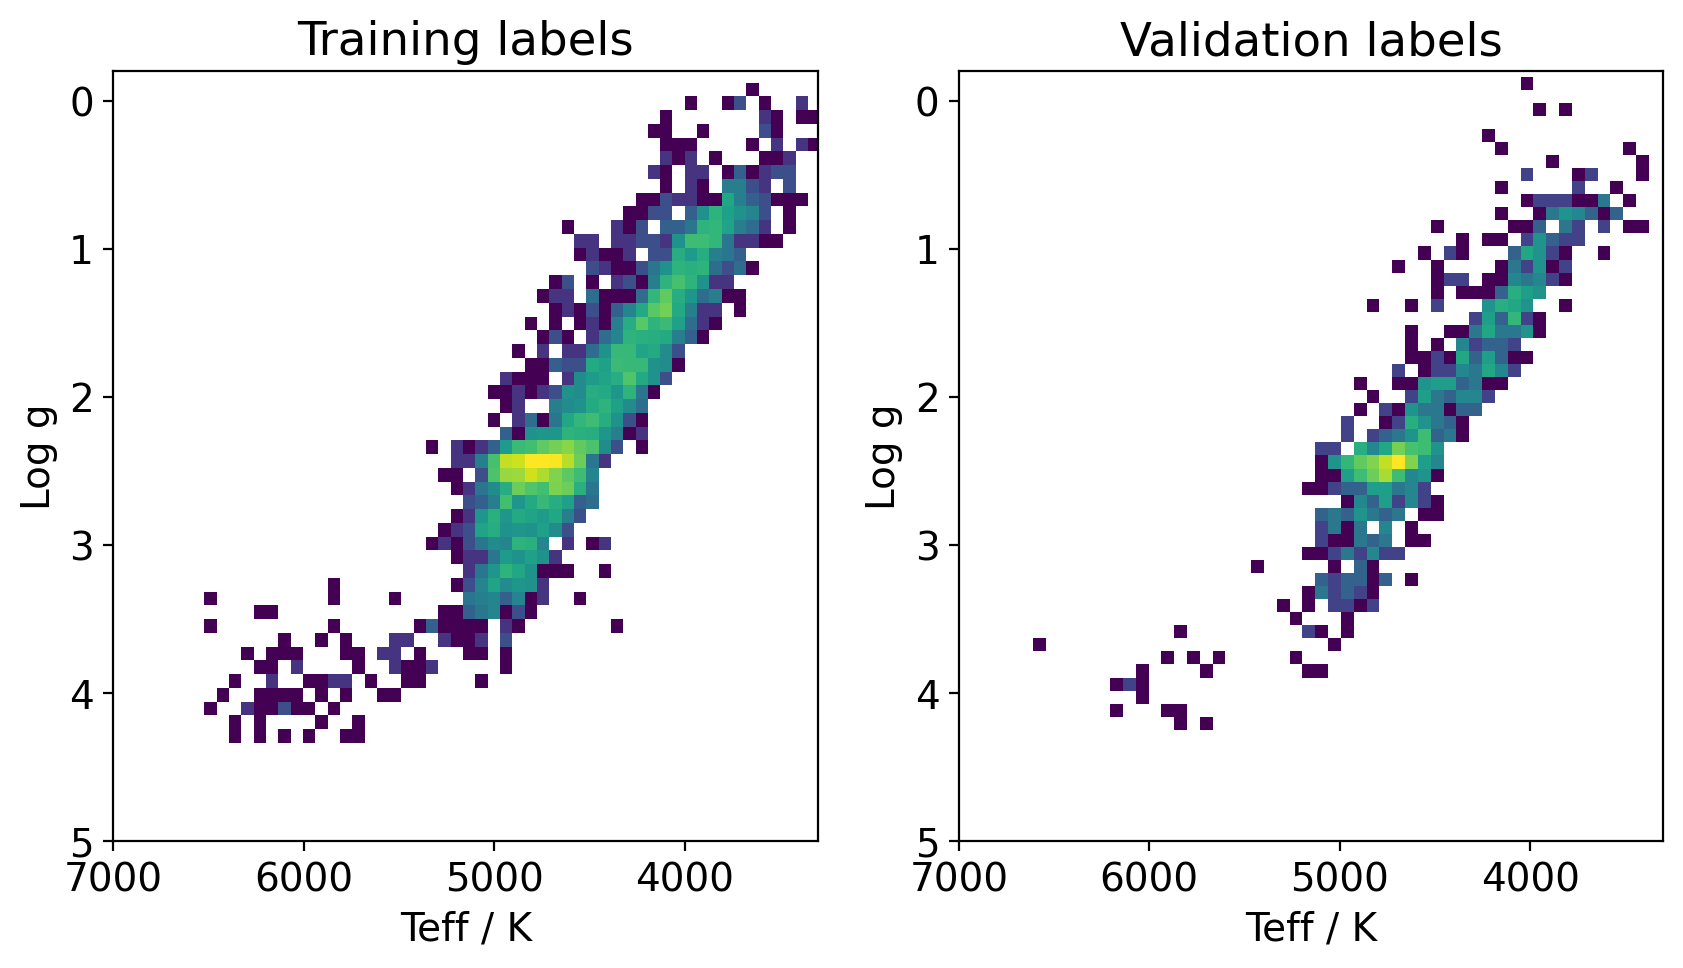

In [45]:
# Teff - Log g plot

fig, axs = plt.subplots(1,2,figsize=(10,5))


for i, ax in enumerate(axs.ravel()):

    
    if i==0:
        ax.hist2d(
        data_tr['labels'][:,0], data_tr['labels'][:,1],
        bins=50, norm=LogNorm());
        ax.set_title("Training labels");
    else:
        ax.hist2d(
        data_val['labels'][:,0], data_val['labels'][:,1],
        bins=50, norm=LogNorm());
        ax.set_title("Validation labels");
        
    ax.set_xlim([7000, 3300]);
    ax.set_ylim([5, -0.2]);
    ax.set_xlabel("Teff / K");
    ax.set_ylabel("Log g");

# show bp and rp coefficients

## first eight coefficients color coded by Logg

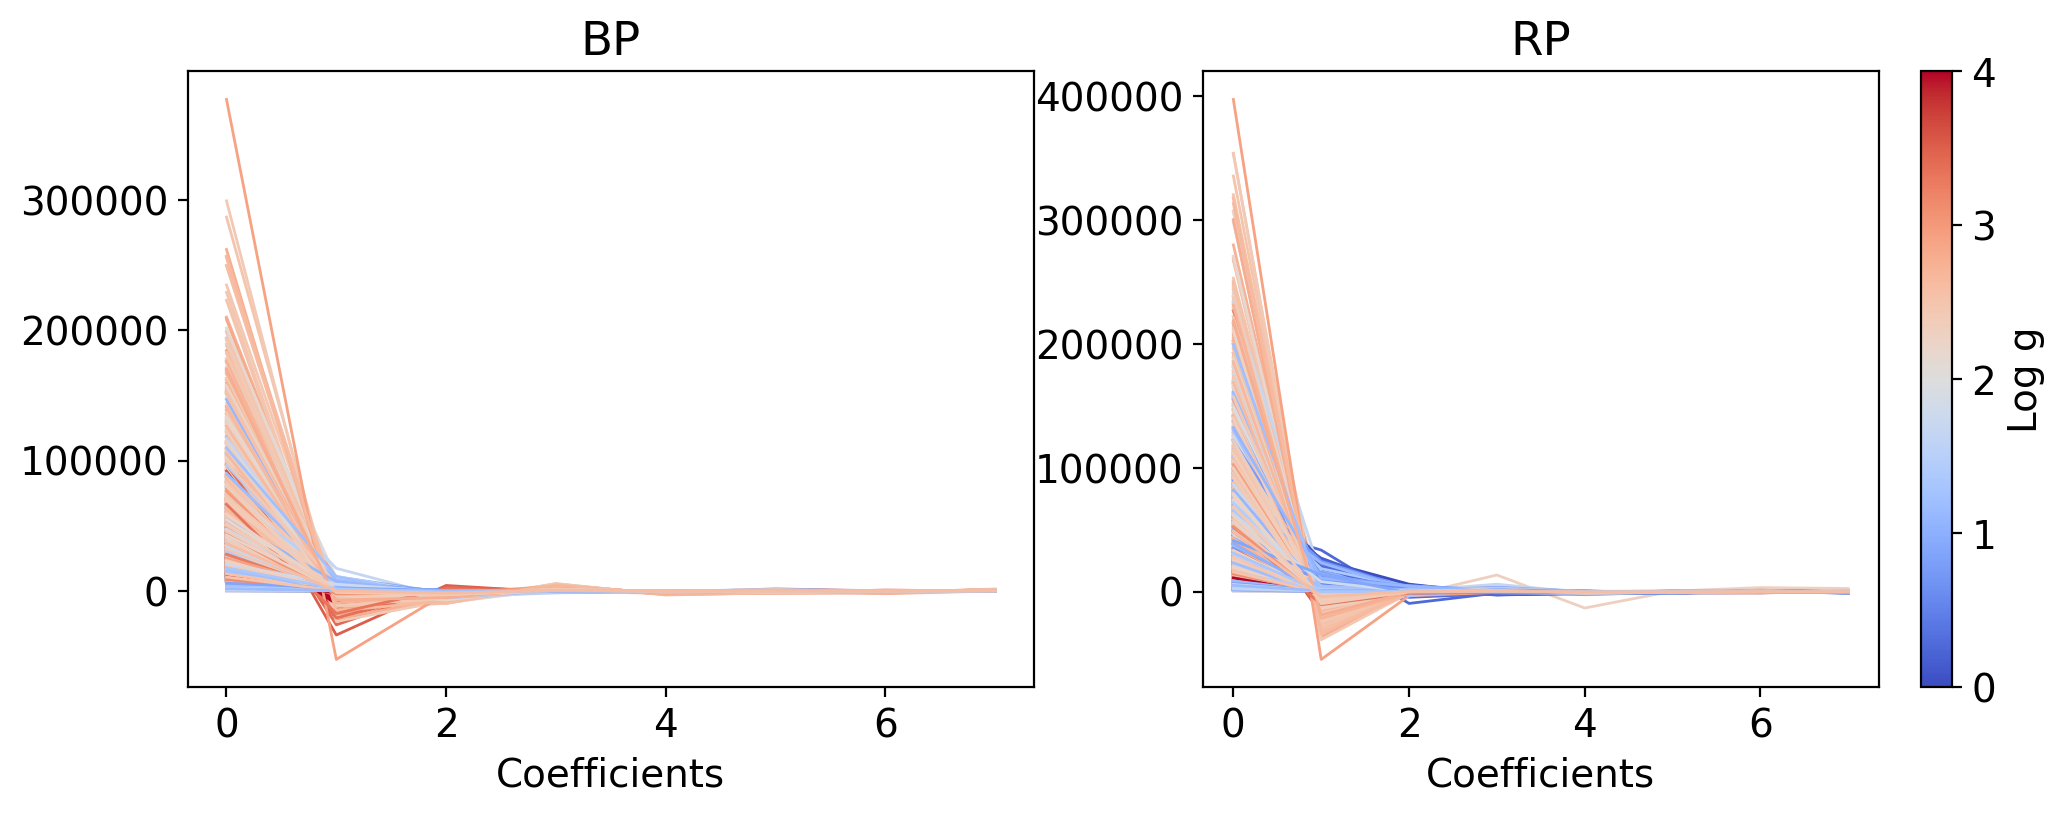

In [34]:

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs.ravel()

cmap = plt.get_cmap('coolwarm')
norm = Normalize(vmin=0,vmax=4)
colors_train_logg = [cmap(norm(_)) for _ in data_tr['labels'][:,1]]

for i,idx in enumerate(range(len(data_tr['labels']))):
    
    xx = np.arange(8)
    ax1.plot(
        xx, data_tr['bp_coef'][idx,:8],lw=1,
        c=colors_train_logg[i]
    )
    ax2.plot(
        xx, data_tr['rp_coef'][idx,:8],lw=1,
        c=colors_train_logg[i]
    )
    
ax1.set_title("BP");
ax2.set_title("RP");

for ax in axs.ravel():
    ax.set_xlabel("index");
    ax.set_xlabel("Coefficients");
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
clb = plt.colorbar(sm, label="Log g")

## first eight coefficients color coded by Teff

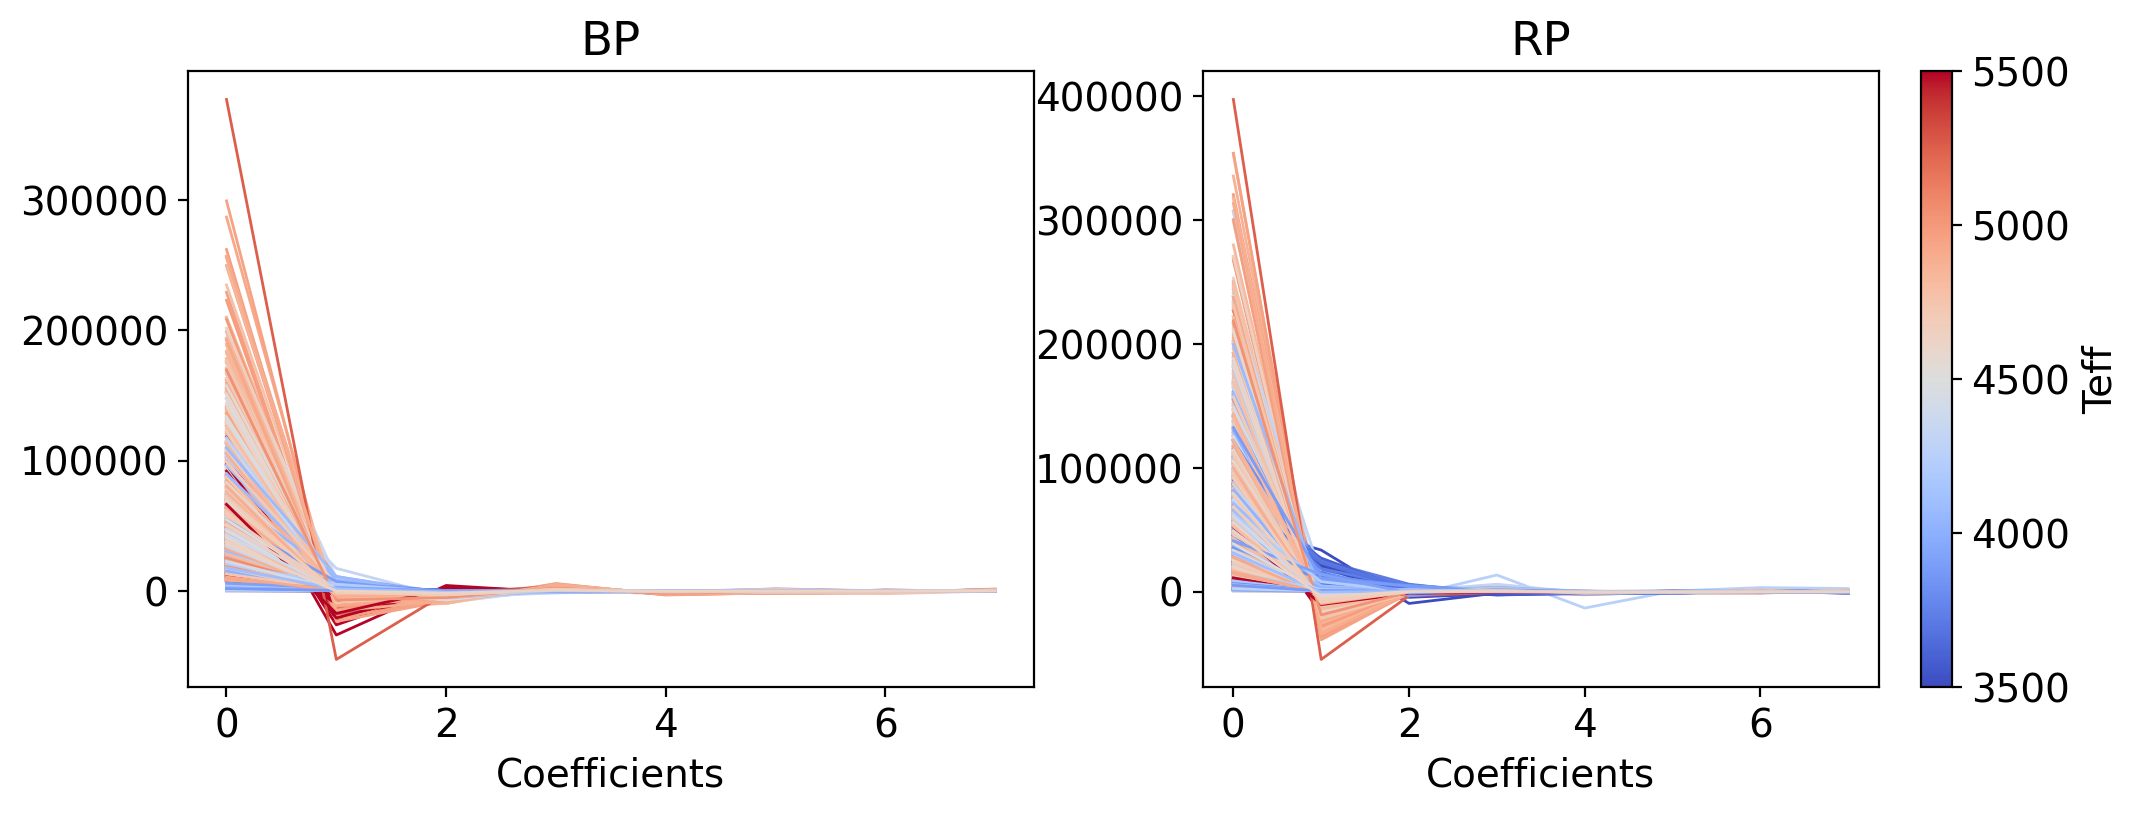

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1, ax2 = axs.ravel()

cmap = plt.get_cmap('coolwarm')
norm = Normalize(vmin=3500, vmax=5500)
colors_train_teff = [cmap(norm(_)) for _ in data_tr['labels'][:,0]]

for i,idx in enumerate(range(len(data_tr['labels']))):
    
    xx = np.arange(8)
    ax1.plot(
        xx, data_tr['bp_coef'][idx,:8],lw=1,
        c=colors_train_teff[i]
    )
    ax2.plot(
        xx, data_tr['rp_coef'][idx,:8],lw=1,
        c=colors_train_teff[i]
    )
    
ax1.set_title("BP");
ax2.set_title("RP");

for ax in axs.ravel():
    ax.set_xlabel("index");
    ax.set_xlabel("Coefficients");
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
clb = plt.colorbar(sm, label="Teff")

# dimensionality reduction

Principal component analysis (PCA).  

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

In [40]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
x_pca = pca.fit_transform(data_tr['bp_coef'])


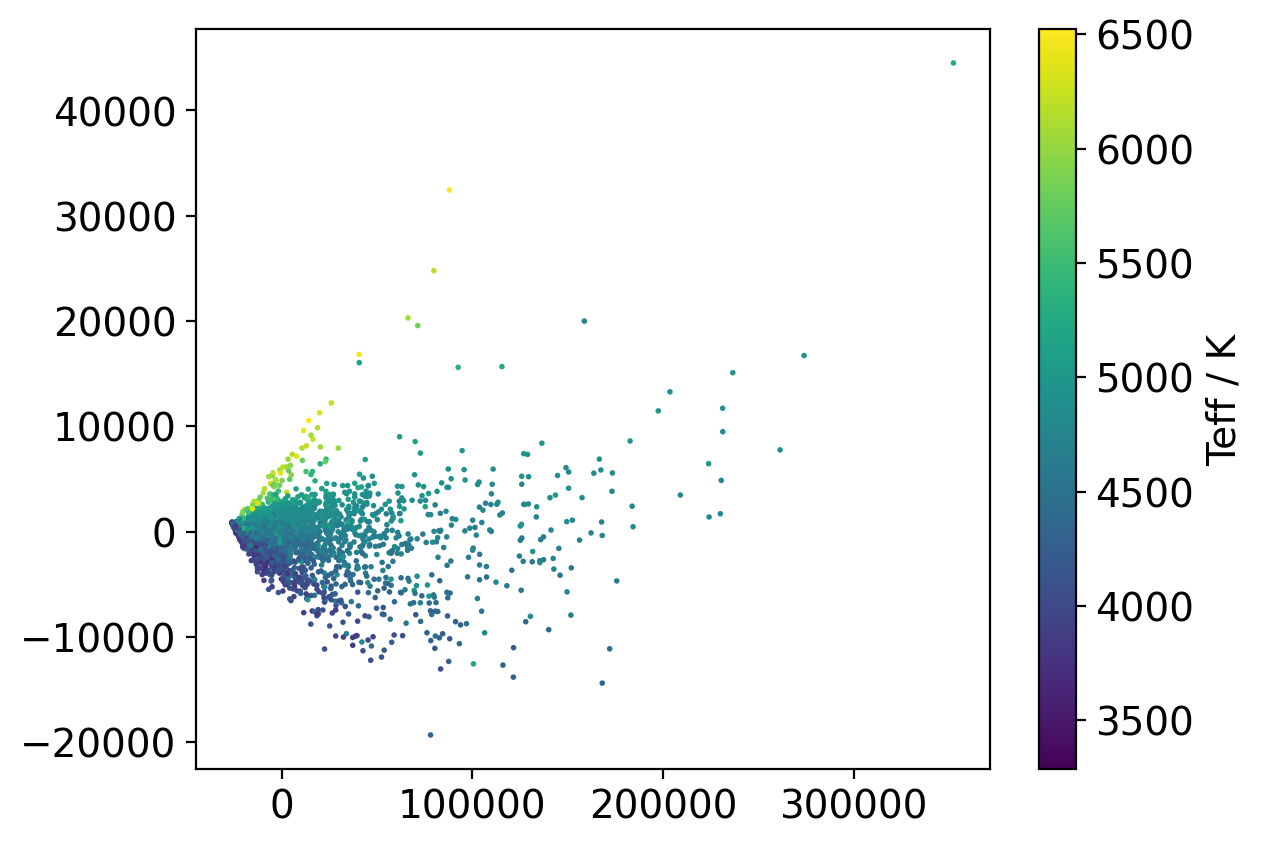

In [49]:
img = plt.scatter(x_pca[:,0], x_pca[:,1], s=1, c=data_tr['labels'][:,0]) 
clb = plt.colorbar(img, label="Teff / K")

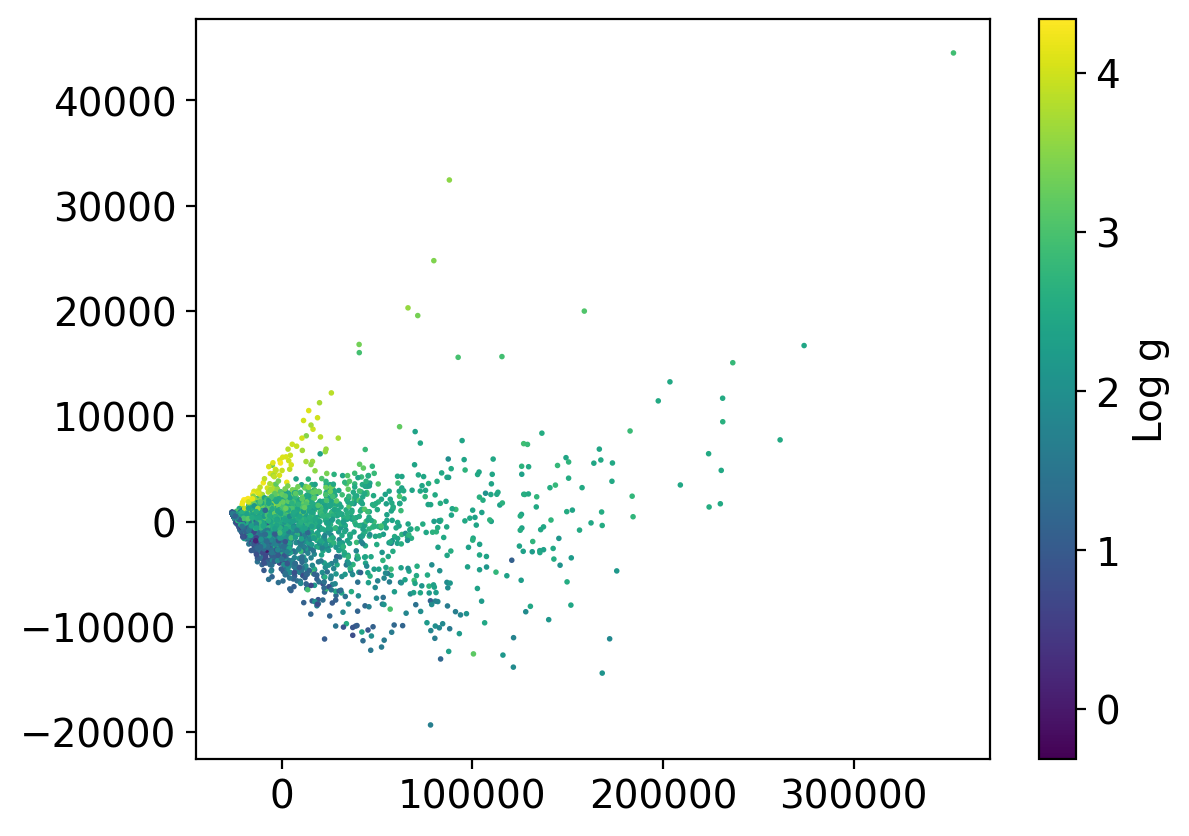

In [48]:
img = plt.scatter(x_pca[:,0], x_pca[:,1], s=1, c=data_tr['labels'][:,1]) 
clb = plt.colorbar(img, label="Log g")